In [84]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import seaborn as sns

from models.CNN import CNNForecaster

In [85]:
model = CNNForecaster((4, 10), (4, 1), 2, 0.0, 32)
model.load_state_dict(torch.load('saved_models/cnn_weights.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [86]:
hist = torch.tensor(np.load('data/box_testing_data/x_train.npy'), dtype=torch.float32)
truth = torch.tensor(np.load('data/box_testing_data/y_train.npy'), dtype=torch.float32)

IDX = np.random.randint(0, hist.shape[0])
print(IDX)

hist_x = hist[IDX:IDX+1, :, :]
truth_y = truth[IDX:IDX+1, :, :]

372


In [87]:
from datetime import datetime as dt

# hist_x = torch.randn((1, 4, 10)).to('cpu')

start = dt.now()

for i in range(50):
    pred = torch.round(model(hist_x[:, :, -10:]))
    hist_x = torch.cat((hist_x, pred.unsqueeze(-1)), dim=-1)

end = dt.now()

print("Time Taken:", end - start)

Time Taken: 0:00:00.033296


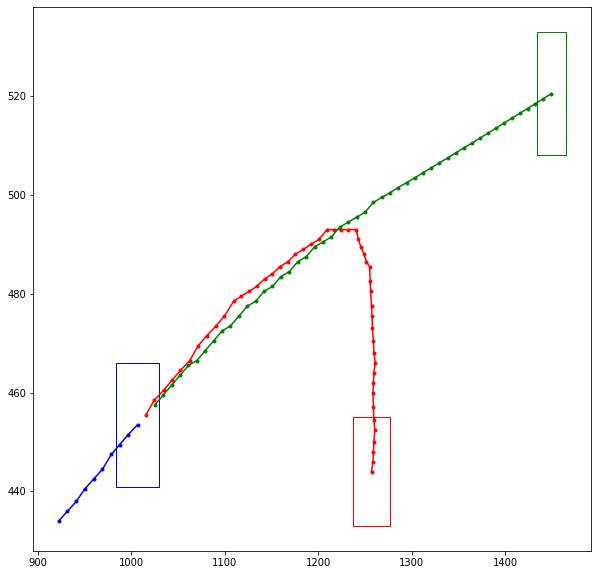

In [88]:
from matplotlib.patches import Rectangle

x_test = hist[IDX:IDX+1, :, :].detach()
y_test = truth[IDX:IDX+1, :, :50].detach()
y_pred = hist_x[:, :, 11:].detach()

def midpoint(arr):
        arr = arr[0]
        x = arr[0] + .5 * arr[2]
        y = arr[1] + .5 * arr[3]
        return np.array([x.numpy(), y.numpy()])
    
x_mid = midpoint(x_test)
y_test_mid = midpoint(y_test)
y_pred_mid = midpoint(y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x_mid[0], x_mid[1], 'b.-')
ax.plot(y_test_mid[0], y_test_mid[1], 'r.-')
ax.plot(y_pred_mid[0], y_pred_mid[1], 'g.-')
ax.add_patch(Rectangle((x_test[0, 0, -1], x_test[0, 1, -1]), x_test[0, 2, -1], x_test[0, 3, -1], fill=False, edgecolor='blue'))
ax.add_patch(Rectangle((y_test[0, 0, -1], y_test[0, 1, -1]), y_test[0, 2, -1], y_test[0, 3, -1], fill=False, edgecolor='red'))
ax.add_patch(Rectangle((y_pred[0, 0, -1], y_pred[0, 1, -1]), y_pred[0, 2, -1], y_pred[0, 3, -1], fill=False, edgecolor='green'))